## **Informations**

This project is focused on analyzing and predicting the popularity of songs on Spotify using various metrics. The work is divided into two main parts:

1. Exploratory Data Analysis (EDA):
The first part of the project involves an exploratory analysis of the most popular songs currently on Spotify. For this analysis, we use a dataset that is updated daily, allowing us to understand trends, patterns, and characteristics of top-performing tracks.

Dataset: [Top Spotify Songs in 73 Countries (Daily Updated)](https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated)

2. Machine Learning Model:
The second part of the project leverages another dataset to build a machine learning model aimed at predicting song popularity. The model utilizes a variety of metrics, including:

* duration_ms (song duration)
* danceability (suitability for dancing)
* energy (intensity and activity)
* key (musical key of the track)
* loudness (overall volume level)
* tempo (speed in beats per minute)
* mode (major or minor key)
* speechiness (presence of spoken words)
* acousticness (likelihood of being acoustic)
* instrumentalness (instrumental content)
* liveness (probability of being live)
* valence (musical positiveness)
* time_signature (beats per measure)

By analyzing these features, the project aims to accurately model and predict the future popularity of songs on Spotify.



**Dataset:** [Spotify Tracks Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?utm_campaign=%5Bb2c%5D%207DoC%20Machine%20Learning%201%C2%AA&utm_medium=email&_hsenc=p2ANqtz-8OCKSJQQDElpjSXyJcsmQYkYPThKyC3TYSdrmQEFW-_RY1ycM4a8_GkrxvN87ZcG78sigNbDQ7m537msFMMDcvlUXLWJ0k_QR3TAggCoYCmdtbLPI&_hsmi=270747671&utm_content=270747671&utm_source=hs_automation)

## **1. Importing data**

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'top-spotify-songs-in-73-countries-daily-updated:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3905195%2F9225972%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240823%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240823T014409Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D69fd5b3253a12e8c41fcced58ca61794d2104e16c4f78d0567daa5972f326fb1222ad00ddf9fea52152dd3fab19996527df6d13d8feef9c7372ea8b693a660a3e06414b6604cf327efd6dae3d67e97d5e3e5de301241a1a0387c5ac457ccebcc765edc0b7d8e5d0f965d3ac25c698aa64e9a9188ab2824df77012713892d9afc97d41558d7ec90286dc6dab2a378f1e5122cc0ed3a016d9393e844a702f36fb2a046fdd304cd5e3f1e34b2702295856765fdfbd67a082429c6d52f70a093d9139f06416523304e4863b4fa25f41b6a769f0f2e348c040565350d95515683683ff7c5eeedd2d261a79f7c28de06347d044bb6cad2edf3f02f17d2b18260b9cef1'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 90381494 bytes downloaded
Downloaded and uncompressed: top-spotify-songs-in-73-countries-daily-updated
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-in-73-countries-daily-updated/universal_top_spotify_songs.csv


In [ ]:
data = pd.read_csv("/kaggle/input/top-spotify-songs-in-73-countries-daily-updated/universal_top_spotify_songs.csv")

In [ ]:
data.head(11)

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,1,0,0,NaN,2024-08-22,100,False,...,2,-10.171,1,0.0358,0.20000,0.060800,0.1170,0.438,104.978,4
1,7tI8dRuH2Yc6RuoTjxo4dU,Who,Jimin,2,0,0,NaN,2024-08-22,95,False,...,0,-3.743,0,0.0320,0.00289,0.000000,0.1930,0.838,116.034,4
2,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",3,0,47,NaN,2024-08-22,86,False,...,6,-7.777,0,0.0304,0.30800,0.000000,0.1220,0.535,157.969,3
3,2qSkIjg1o9h3YT9RAgYN75,Espresso,Sabrina Carpenter,4,0,-1,NaN,2024-08-22,98,True,...,0,-5.478,1,0.0285,0.10700,0.000065,0.1850,0.690,103.969,4
4,6WatFBLVB0x077xWeoVc2k,Si Antes Te Hubiera Conocido,KAROL G,5,0,1,NaN,2024-08-22,96,False,...,11,-6.795,1,0.0469,0.44600,0.000594,0.0678,0.787,128.027,4
5,0WbMK4wrZ1wFSty9F7FCgu,"Good Luck, Babe!",Chappell Roan,6,0,-1,NaN,2024-08-22,96,False,...,11,-5.960,0,0.0356,0.05020,0.000000,0.0881,0.785,116.712,4
6,5N3hjp1WNayUPZrA8kJmJP,Please Please Please,Sabrina Carpenter,7,0,-3,NaN,2024-08-22,97,True,...,9,-6.073,1,0.0540,0.27400,0.000000,0.1040,0.579,107.071,4
7,0OA00aPt3BV10qeMIs3meW,Big Dawgs,"Hanumankind, Kalmi",8,0,-1,NaN,2024-08-22,91,True,...,4,-3.202,0,0.1610,0.02350,0.000000,0.3630,0.262,180.098,4
8,3xkHsmpQCBMytMJNiDf3Ii,Beautiful Things,Benson Boone,9,0,0,NaN,2024-08-22,91,False,...,10,-5.692,1,0.0603,0.15100,0.000000,0.1400,0.219,105.029,3
9,5IZXB5IKAD2qlvTPJYDCFB,I Had Some Help (Feat. Morgan Wallen),"Post Malone, Morgan Wallen",10,0,40,NaN,2024-08-22,77,True,...,0,-4.723,1,0.0265,0.01130,0.000000,0.2270,0.753,128.017,4


## **2. Understanding the data**

In [ ]:
data.shape

(1117403, 25)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117403 entries, 0 to 1117402
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   spotify_id          1117403 non-null  object 
 1   name                1117376 non-null  object 
 2   artists             1117376 non-null  object 
 3   daily_rank          1117403 non-null  int64  
 4   daily_movement      1117403 non-null  int64  
 5   weekly_movement     1117403 non-null  int64  
 6   country             1102246 non-null  object 
 7   snapshot_date       1117403 non-null  object 
 8   popularity          1117403 non-null  int64  
 9   is_explicit         1117403 non-null  bool   
 10  duration_ms         1117403 non-null  int64  
 11  album_name          1116814 non-null  object 
 12  album_release_date  1116976 non-null  object 
 13  danceability        1117403 non-null  float64
 14  energy              1117403 non-null  float64
 15  key            

In [ ]:
data.isnull().sum()

,0
spotify_id,0
name,27
artists,27
daily_rank,0
daily_movement,0
weekly_movement,0
country,15157
snapshot_date,0
popularity,0
is_explicit,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
daily_rank,1117403.0,25.489753,14.428434,1.000000,13.0000,25.000000,38.000000,50.000
daily_movement,1117403.0,0.772430,6.643205,-49.000000,-1.0000,0.000000,2.000000,49.000
weekly_movement,1117403.0,2.536634,11.852268,-49.000000,-3.0000,0.000000,5.000000,49.000
popularity,1117403.0,76.757475,15.981561,0.000000,66.0000,81.000000,89.000000,100.000
duration_ms,1117403.0,192587.123441,50329.009980,0.000000,160507.0000,185002.000000,217200.000000,939666.000
danceability,1117403.0,0.686051,0.137357,0.000000,0.5960,0.704000,0.788000,0.988
energy,1117403.0,0.651583,0.162696,0.000020,0.5510,0.671000,0.764000,0.998
key,1117403.0,5.513282,3.571593,0.000000,2.0000,6.000000,9.000000,11.000
loudness,1117403.0,-6.443639,2.593828,-37.334000,-7.7970,-5.983000,-4.726000,3.233
mode,1117403.0,0.539761,0.498417,0.000000,0.0000,1.000000,1.000000,1.000


In [ ]:
data.describe(include=[object]).T

,count,unique,top,freq
spotify_id,1117403,14076,3rUGC1vUpkDG9CZFHMur1t,8423
name,1117376,12788,greedy,8423
artists,1117376,8574,Taylor Swift,17734
country,1102246,72,DO,15425
snapshot_date,1117403,308,2024-03-16,3942
album_name,1116814,9673,nadie sabe lo que va a pasar mañana,16188
album_release_date,1116976,2077,2023-10-13,22923


Limpeza dos dados

In [ ]:
data = data.dropna(subset=['name', 'artists','album_name', 'album_release_date'])
data = data.fillna(' ')

## **3. Exploratory Data Analysis**

### 3.1. Popular artists per country

In [ ]:
country_codes = {
    ' ': 'Unknown',
    'ZA': 'South Africa',
    'VN': 'Vietnam',
    'VE': 'Venezuela',
    'UY': 'Uruguay',
    'US': 'United States',
    'UA': 'Ukraine',
    'TW': 'Taiwan',
    'TR': 'Turkey',
    'TH': 'Thailand',
    'SV': 'El Salvador',
    'SK': 'Slovakia',
    'SG': 'Singapore',
    'SE': 'Sweden',
    'SA': 'Saudi Arabia',
    'RO': 'Romania',
    'PY': 'Paraguay',
    'PT': 'Portugal',
    'PL': 'Poland',
    'PK': 'Pakistan',
    'PH': 'Philippines',
    'PE': 'Peru',
    'PA': 'Panama',
    'NZ': 'New Zealand',
    'NO': 'Norway',
    'NL': 'Netherlands',
    'NI': 'Nicaragua',
    'NG': 'Nigeria',
    'MY': 'Malaysia',
    'MX': 'Mexico',
    'MA': 'Morocco',
    'LV': 'Latvia',
    'LU': 'Luxembourg',
    'LT': 'Lithuania',
    'KZ': 'Kazakhstan',
    'KR': 'South Korea',
    'JP': 'Japan',
    'IT': 'Italy',
    'IS': 'Iceland',
    'IN': 'India',
    'IL': 'Israel',
    'IE': 'Ireland',
    'ID': 'Indonesia',
    'HU': 'Hungary',
    'HN': 'Honduras',
    'HK': 'Hong Kong',
    'GT': 'Guatemala',
    'GR': 'Greece',
    'GB': 'United Kingdom',
    'FR': 'France',
    'FI': 'Finland',
    'ES': 'Spain',
    'EG': 'Egypt',
    'EE': 'Estonia',
    'EC': 'Ecuador',
    'DO': 'Dominican Republic',
    'DK': 'Denmark',
    'DE': 'Germany',
    'CZ': 'Czech Republic',
    'CR': 'Costa Rica',
    'CO': 'Colombia',
    'CL': 'Chile',
    'CH': 'Switzerland',
    'CA': 'Canada',
    'BY': 'Belarus',
    'BR': 'Brazil',
    'BO': 'Bolivia',
    'BG': 'Bulgaria',
    'BE': 'Belgium',
    'AU': 'Australia',
    'AT': 'Austria',
    'AR': 'Argentina',
    'AE': 'United Arab Emirates'
}

In [ ]:
data['country_names'] = data['country'].map(country_codes)
data['artist_song'] = data['artists'] + ' - ' + data['name']

In [ ]:
idx = data.groupby('country')['popularity'].idxmax()
pop_artist_per_country = data.loc[idx, ['artists', 'name', 'country', 'country_names', "artist_song", 'popularity']].reset_index(drop=True)

In [ ]:
import plotly.express as px

In [ ]:
fig = px.choropleth(
    data_frame=pop_artist_per_country,
    locations='country_names',
    locationmode='country names',
    color='artist_song',
    hover_name='artist_song',
    hover_data={'country_names': False},
    projection='natural earth',
    title='Most popular artist per country',
)

fig.show()

### 3.2. Correlations involving songs/artists popularity

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

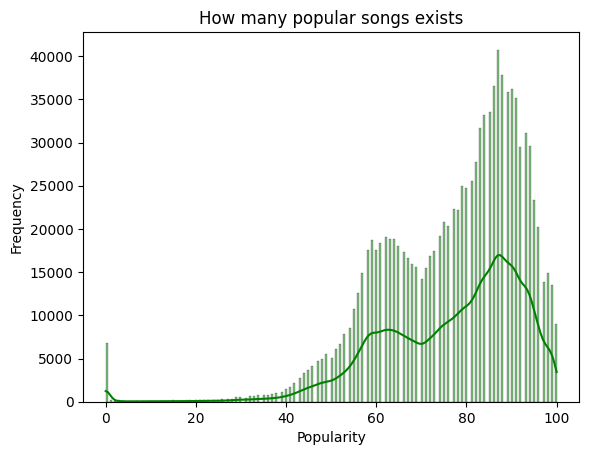

In [ ]:
sns.histplot(data['popularity'], kde=True, color='green')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('How many popular songs exists')
plt.show()

In [ ]:
pop_data = data[['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']]

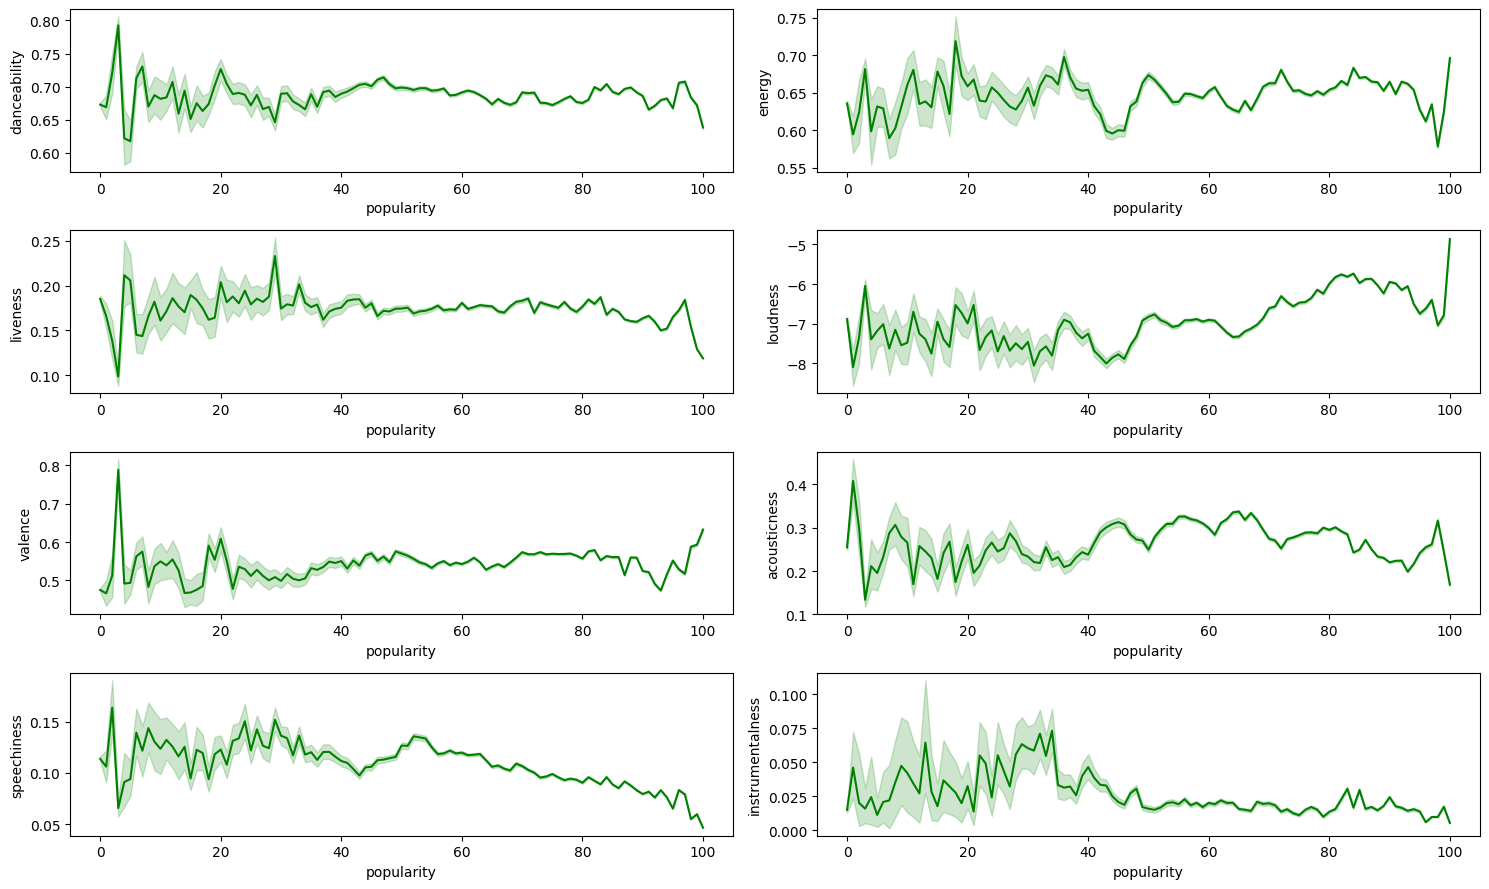

In [ ]:
fig, axs = plt.subplots(4,2, figsize=(15,9))

colunas = ['danceability','energy', 'liveness','loudness','valence',
           "acousticness","speechiness",'instrumentalness']

axs = axs.flatten()
for ax, col in zip(axs, colunas):
    sns.lineplot(ax=ax, data=pop_data, x='popularity', y=col, color='green')

# Ajuste layout
plt.tight_layout()

# Mostre a figura
plt.show()

In [ ]:
#Correlation by Pearson
corr_table = data[[ 'popularity',
       'is_explicit', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature']].corr(method="pearson")

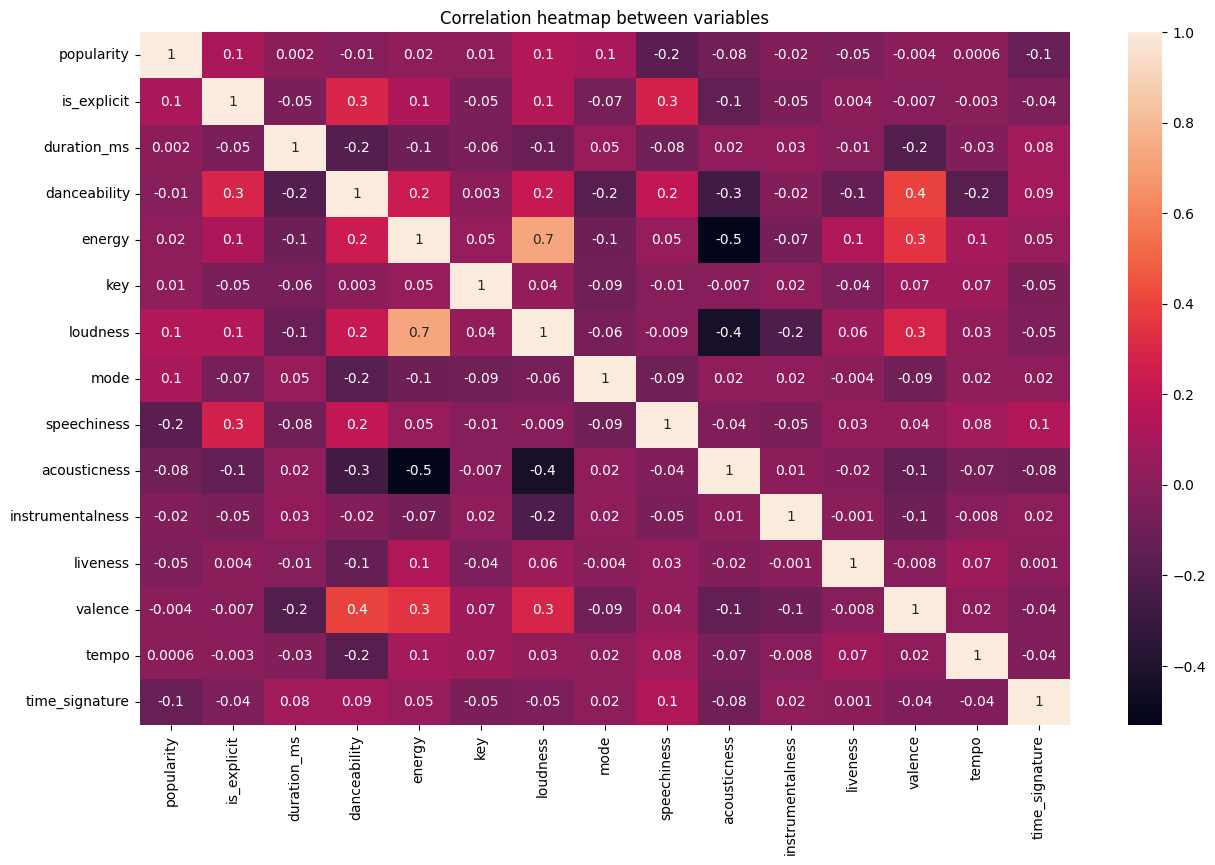

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(corr_table, annot=True, fmt='.1g')
plt.title("Correlation heatmap between variables")
plt.show()

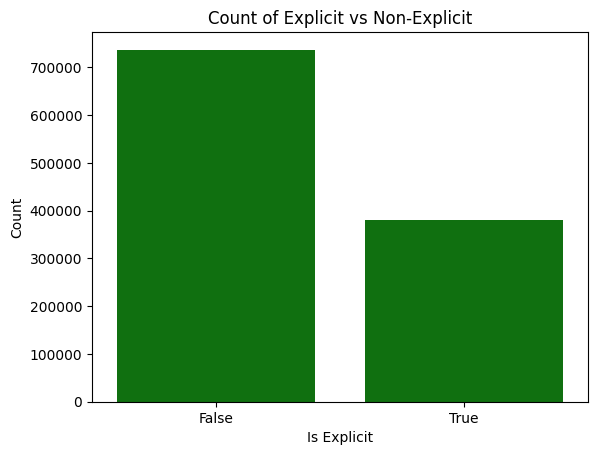

In [ ]:
is_explicit_count = data[['name',"is_explicit"]].groupby("is_explicit").agg('count').reset_index()
sns.barplot(x='is_explicit', y='name', data=is_explicit_count, color='green')
plt.xlabel('Is Explicit')
plt.ylabel('Count')
plt.title('Count of Explicit vs Non-Explicit')
plt.show()

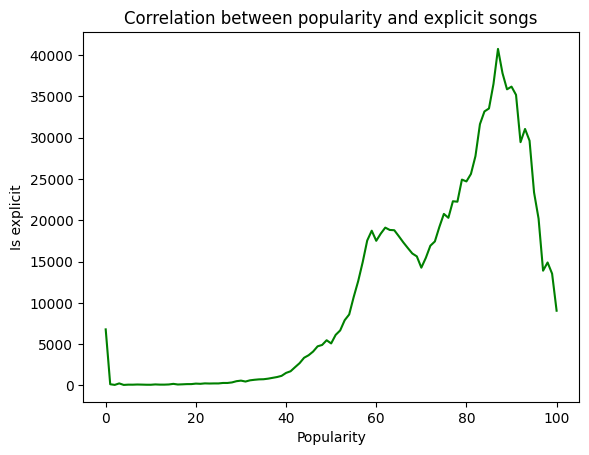

In [ ]:
top_explicit = data[['popularity',"is_explicit"]].groupby("popularity").agg('count').reset_index()
graph_exp = sns.lineplot(data=top_explicit, x="popularity", y="is_explicit", color='green')
graph_exp.set(title='Correlation between popularity and explicit songs', xlabel='Popularity', ylabel='Is explicit');

In [ ]:
data['duration_min'] = data['duration_ms'].apply(lambda tempo: tempo/60000)

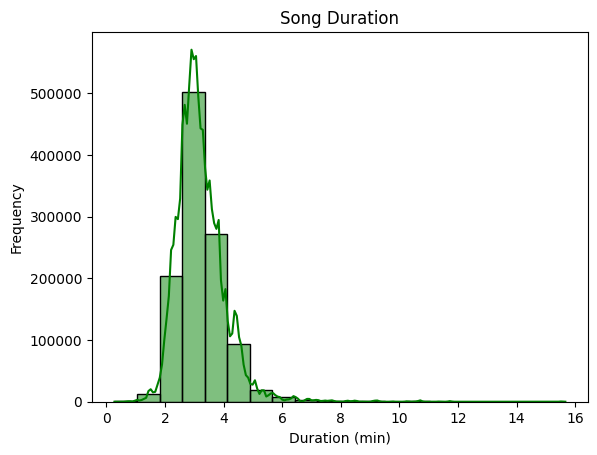

In [ ]:
sns.histplot(data['duration_min'], bins=20, kde=True, color='green')
plt.title('Song Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.show()

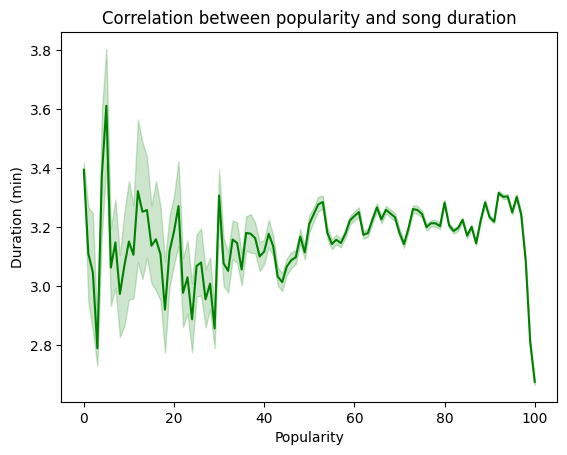

In [ ]:
graph_exp = sns.lineplot(data, x="popularity", y="duration_min", color='green')
graph_exp.set(title='Correlation between popularity and song duration', xlabel='Popularity', ylabel='Duration (min)');

### 3.3. Trending Artists/Songs

In [ ]:
top_artists = data['artists'].value_counts()
top_artists = pd.DataFrame(top_artists)
top_artists = top_artists.head(10)

<Figure size 1000x600 with 0 Axes>

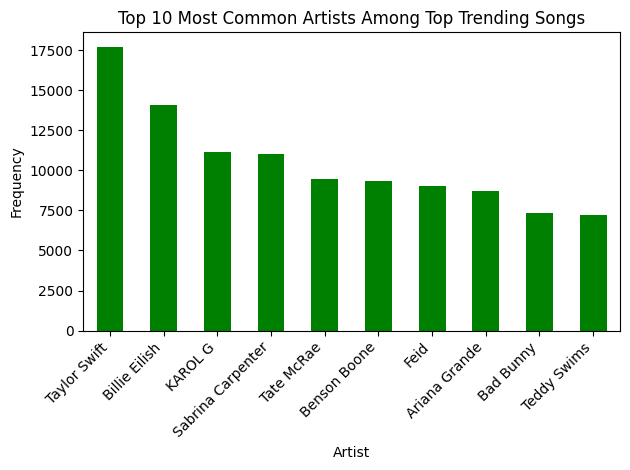

In [ ]:
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='green')
plt.title('Top 10 Most Common Artists Among Top Trending Songs')
plt.xlabel('Artist')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.gca().legend_.remove() if plt.gca().legend_ else None
plt.tight_layout()
plt.show();

In [ ]:
top_songs = data[["artist_song",'popularity']].loc[0:9].set_index('artist_song')

<Figure size 1200x800 with 0 Axes>

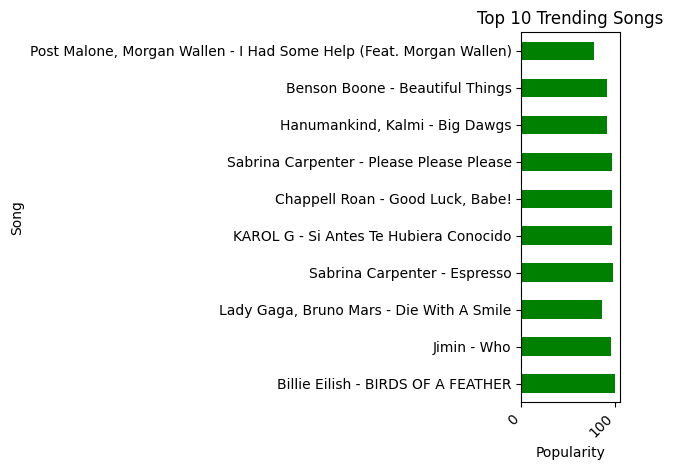

In [ ]:
plt.figure(figsize=(12, 8))
top_songs.plot(kind='barh', color='green')
plt.title('Top 10 Trending Songs')
plt.xlabel('Popularity')
plt.ylabel('Song')
plt.xticks(rotation=45, ha='right')
plt.gca().legend_.remove() if plt.gca().legend_ else None
plt.tight_layout()
plt.show();

### 3.4. Songs Metrics

In [ ]:
key_to_note = {
    0: "C",
    1: "C#/Db",
    2: "D",
    3: "D#/Eb",
    4: "E",
    5: "F",
    6: "F#/Gb",
    7: "G",
    8: "G#/Ab",
    9: "A",
    10: "A#/Bb",
    11: "B"
}

mode_to_note = {
    0: "Minor",
    1: "Major"
}

In [ ]:
data['key_to_note'] = data['key'].map(key_to_note)
data['mode_to_note'] = data['mode'].map(mode_to_note)

In [ ]:
mode_t = data[['key_to_note',"mode_to_note"]].groupby(["key_to_note",'mode_to_note']).value_counts().reset_index()

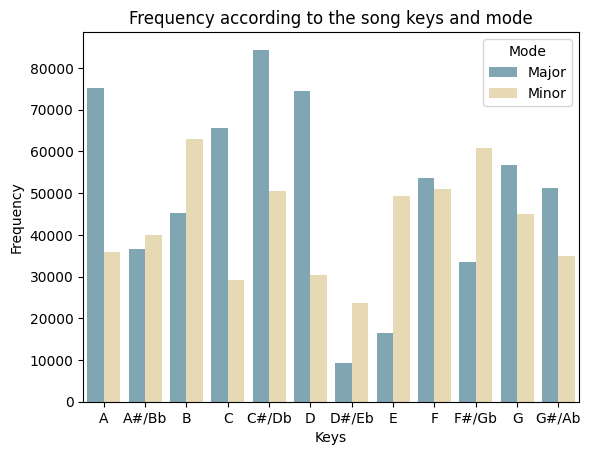

In [ ]:
graph_bar_key = sns.barplot(data=mode_t, x="key_to_note", y='count', hue='mode_to_note', palette='blend:#7AB,#EDA')
graph_bar_key.set(title="Frequency according to the song keys and mode", xlabel="Keys", ylabel="Frequency")
graph_bar_key.legend(title="Mode")

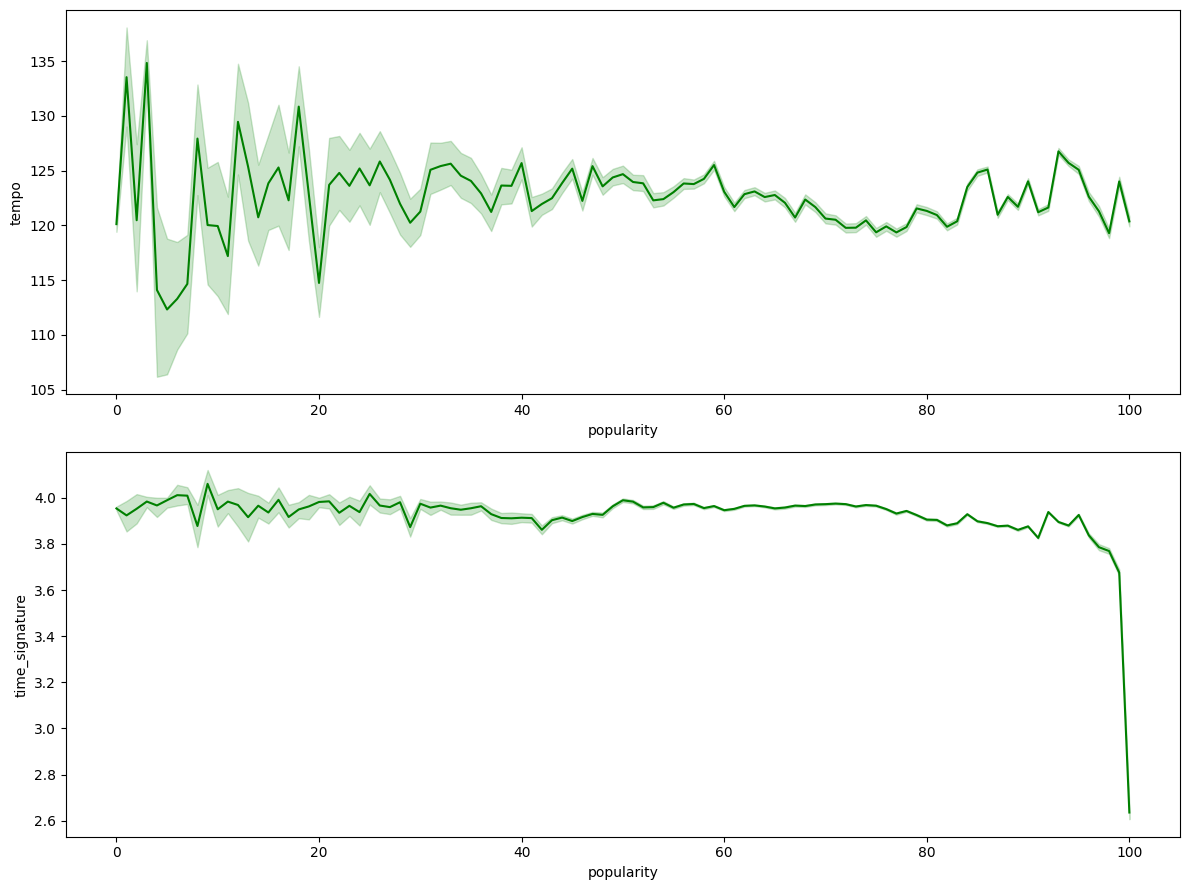

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(12,9))
colunas = ['tempo', 'time_signature']

axs = axs.flatten()
for ax, col in zip(axs, colunas):
    sns.lineplot(ax=ax, data=pop_data, x='popularity', y=col, color='green')

# Ajuste layout
plt.tight_layout()

# Mostre a figura
plt.show()

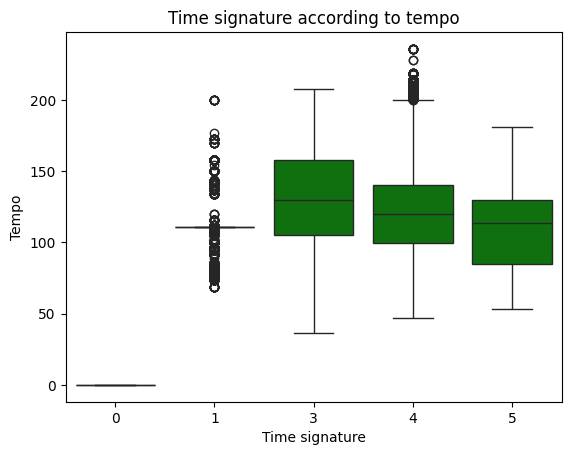

In [ ]:
graph_box = sns.boxplot(y=data["tempo"], x=data["time_signature"], color='green')
graph_box.set(title="Time signature according to tempo", xlabel="Time signature", ylabel="Tempo");

## **4. Machine Learning**

### 4.1. EDA from Spotify Tracks

In [ ]:
tracks = pd.read_csv('/content/dataset_tracks.csv')

In [ ]:
tracks.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
tracks.drop(columns=['Unnamed: 0',"track_id"], inplace=True)
tracks.dropna(inplace=True)

<ipython-input-41-c95871d236ac>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




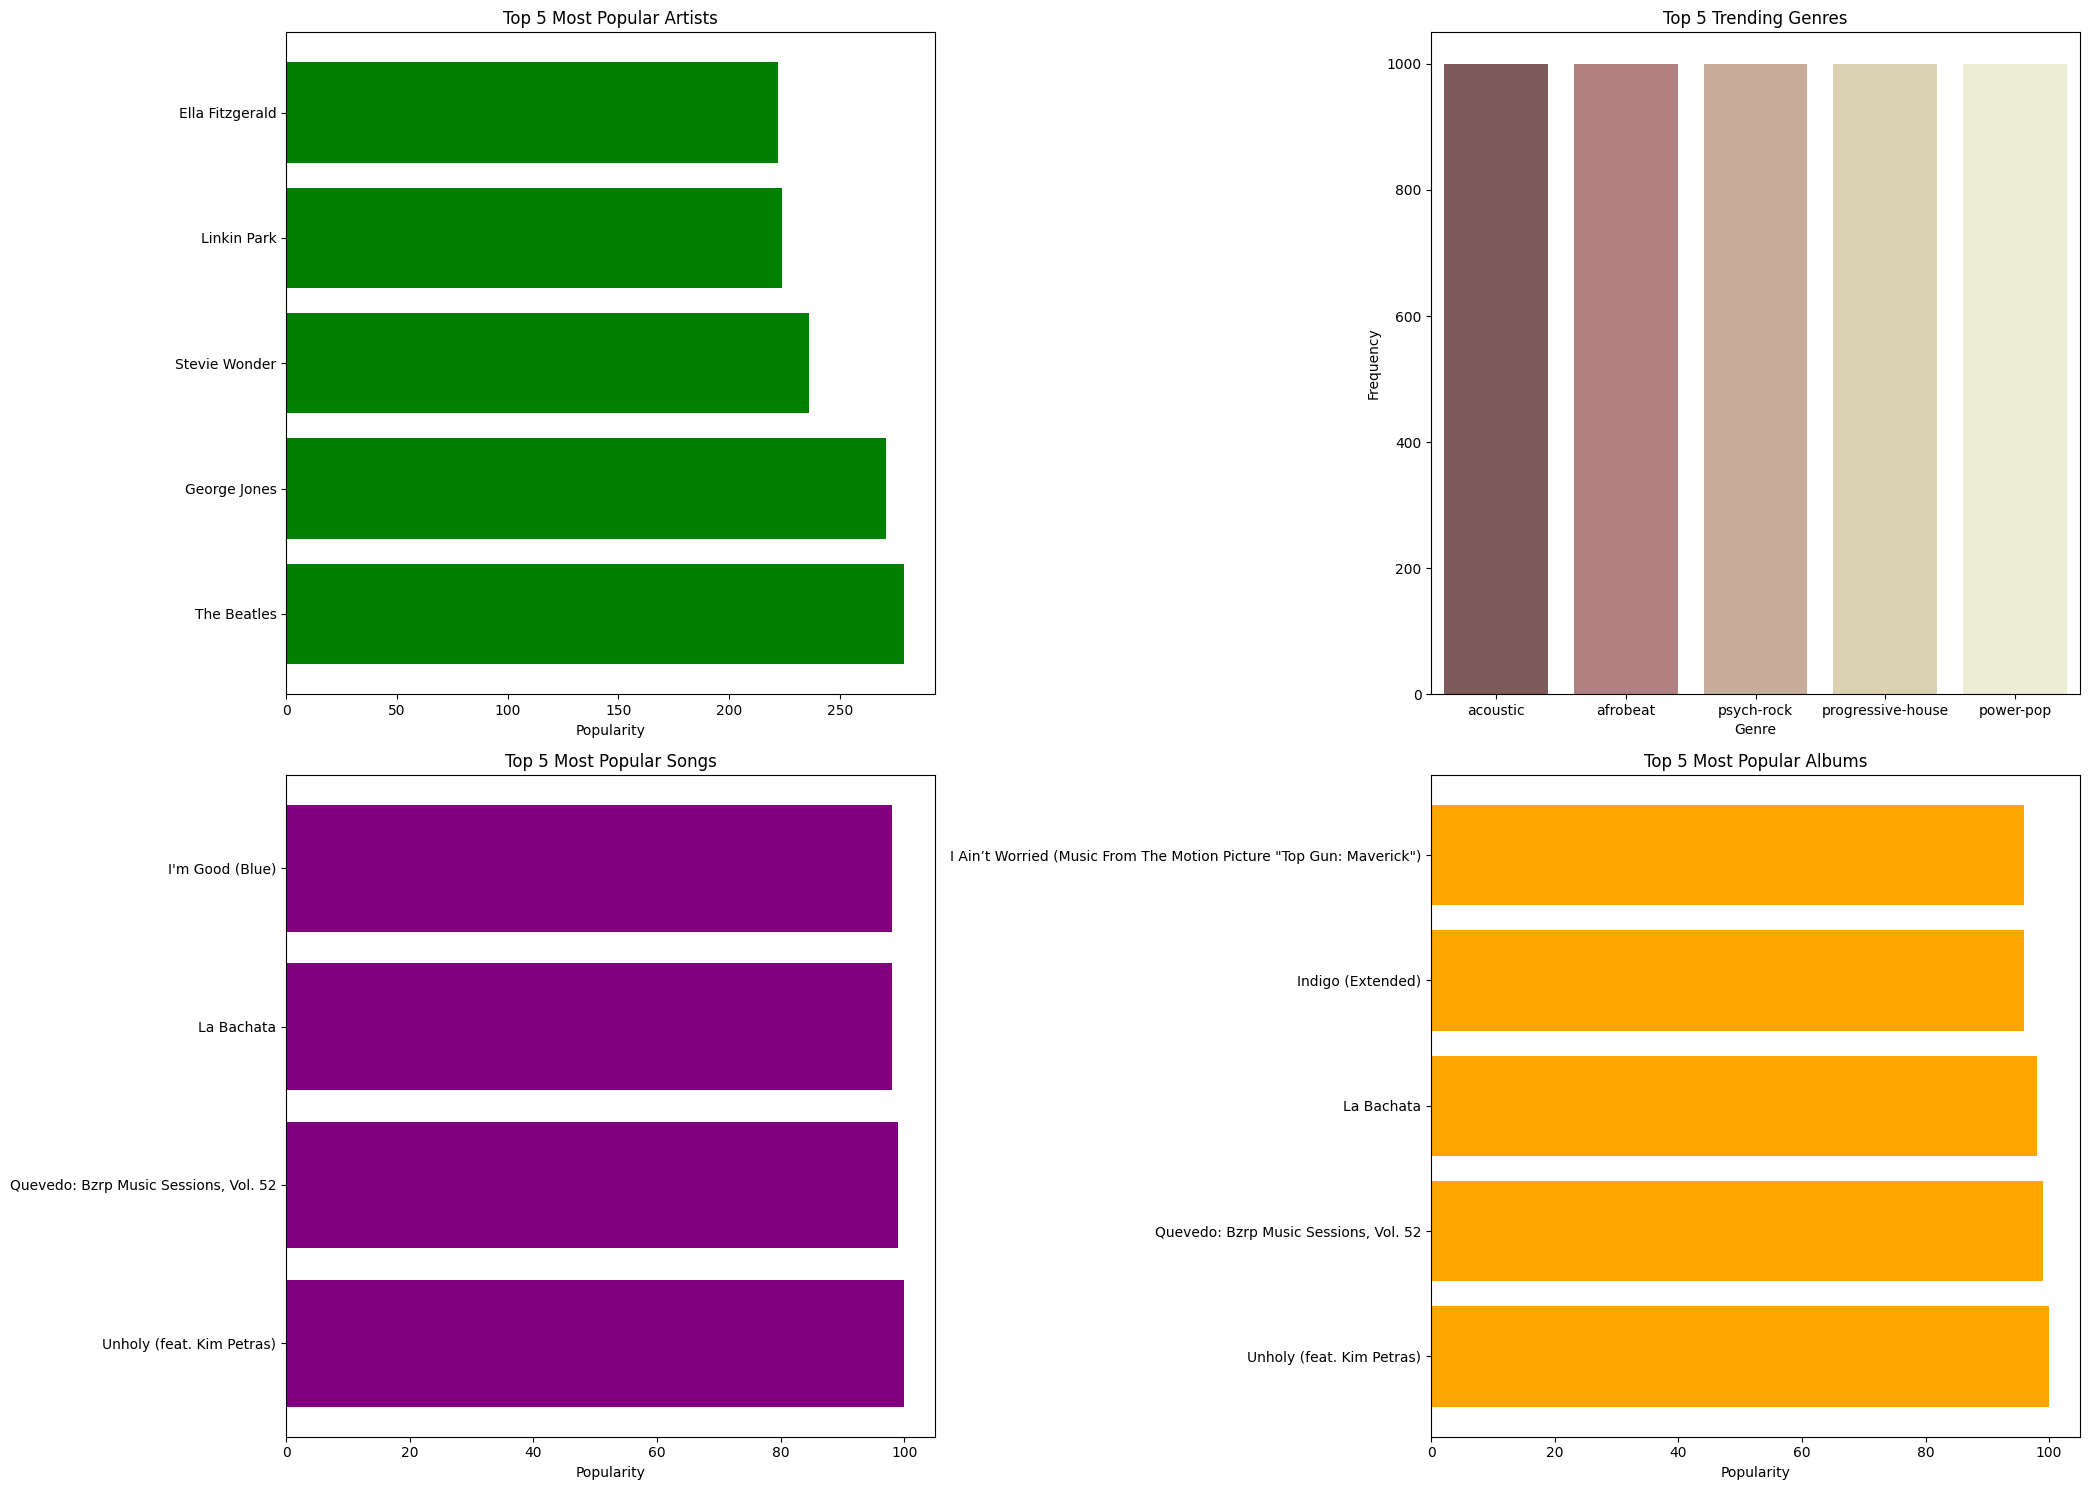

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(21, 15))

# Top 5 Most Popular Artists
popular_artists = tracks.groupby("artists").count().sort_values(by='popularity', ascending=False)['popularity'][:5]
axs[0, 0].barh(popular_artists.index, popular_artists.values, color="green")
axs[0, 0].set_title("Top 5 Most Popular Artists")
axs[0, 0].set_xlabel("Popularity")

#Top 5 Most Trending Genres
trend_genre = tracks[['track_genre', 'popularity']].groupby('track_genre').count().sort_values(by='popularity', ascending=False).head(5)
sns.barplot(x=trend_genre.index, y=trend_genre['popularity'], palette='pink', ax=axs[0, 1])
axs[0, 1].set_title("Top 5 Trending Genres")
axs[0, 1].set_xlabel("Genre")
axs[0, 1].set_ylabel("Frequency")

#Top 5 Most Popular Songs
top_songs = tracks[['track_name', 'popularity']].sort_values(by='popularity', ascending=False).head(5)
axs[1, 0].barh(top_songs['track_name'], top_songs['popularity'], color='purple')
axs[1, 0].set_title("Top 5 Most Popular Songs")
axs[1, 0].set_xlabel("Popularity")

#Top 5 Most Popular Albums
top_albums = tracks[['album_name', 'popularity']].groupby('album_name').mean().sort_values(by='popularity', ascending=False).head(5)
axs[1, 1].barh(top_albums.index, top_albums['popularity'], color='orange')
axs[1, 1].set_title("Top 5 Most Popular Albums")
axs[1, 1].set_xlabel("Popularity")

# Ajustar layout e exibir os gráficos
plt.tight_layout()
plt.show()

In [ ]:
pop_data = tracks[['popularity','duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

### 4.2. Train/Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
  pop_data.drop(['popularity'], axis=1), pop_data["popularity"],
   test_size=0.25,
  random_state=123
)

In [ ]:
predictors_train

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
106954,187159,0.809,0.2690,0,-17.422,1,0.1020,0.659000,0.006490,0.1200,0.4800,127.011,4
464,145514,0.724,0.2800,9,-12.788,1,0.0303,0.755000,0.000000,0.3260,0.5270,106.966,4
14389,131226,0.765,0.3870,7,-6.799,1,0.1470,0.908000,0.000000,0.1850,0.8390,159.966,4
62289,194706,0.598,0.4470,8,-7.932,1,0.0404,0.224000,0.000000,0.0704,0.3650,123.855,4
64081,200461,0.430,0.5430,8,-6.296,1,0.0367,0.463000,0.000523,0.0928,0.3540,143.912,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63206,90000,0.509,0.9650,11,-3.007,1,0.1290,0.257000,0.000000,0.4000,0.7550,97.006,4
61404,218946,0.638,0.8290,2,-2.629,1,0.0311,0.020400,0.000020,0.0178,0.8960,103.047,4
17730,200125,0.525,0.0265,1,-15.997,0,0.0425,0.849000,0.285000,0.1680,0.0771,120.835,1
28030,241411,0.209,0.6340,9,-7.689,1,0.0538,0.000904,0.000000,0.1310,0.1050,170.213,4


### 4.3. Finding best model

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNearest': KNeighborsClassifier()
}

In [ ]:
mae_results = {}
r2_results = {}
results = {}

In [ ]:
for name, model in models.items():
    cv_scores = cross_val_score(model, predictors_train, target_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)

    # Training model for predictions
    model.fit(predictors_train, target_train)
    predictions = model.predict(predictors_train)

    # Metrics evaluation
    mae = mean_absolute_error(target_train, predictions)
    r2 = r2_score(target_train, predictions)
    results[name] = rmse_scores
    mae_results[name] = mae
    r2_results[name] = r2

    print(f"{name} - RMSE: {rmse_scores.mean()} -Standart Deviation: {rmse_scores.std()}")
    print(f"{name} - MAE: {mae:.2f} - R²: {r2:.2f}")

Linear Regression - RMSE: 22.066897846340293 -Standart Deviation: 0.11486856244135801
Linear Regression - MAE: 18.42 - R²: 0.02
Ridge - RMSE: 22.066896820919634 -Standart Deviation: 0.11487207565321493
Ridge - MAE: 18.42 - R²: 0.02
Lasso - RMSE: 22.293603510907637 -Standart Deviation: 0.12975088909571642
Lasso - MAE: 18.86 - R²: 0.00
Random Forest - RMSE: 15.911262514047204 -Standart Deviation: 0.08634617253755565
Random Forest - MAE: 4.34 - R²: 0.91


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Decision Tree - RMSE: 22.100801638882245 -Standart Deviation: 0.11878592419107892
Decision Tree - MAE: 0.49 - R²: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



KNearest - RMSE: 30.166156956097648 -Standart Deviation: 0.13613615601260418
KNearest - MAE: 16.04 - R²: -0.25


### 4.4. Training best model

In [ ]:
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=200, num=10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 100, num=10)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
model = RandomForestRegressor(random_state=42)

In [ ]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=2,
    verbose=2,
    n_jobs=1,
    scoring='neg_mean_squared_error'
)

In [ ]:
grid_search.fit(predictors_train, target_train)

Fitting 2 folds for each of 2970 candidates, totalling 5940 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=111; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=111; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=122; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=122; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=133; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators

In [ ]:
#Searching hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

In [ ]:
#Training model with best hyperparameters
best_model = grid_search.best_estimator_

Using KFold

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []

for train_index, test_index in kf.split(predictors_train):
    X_train, X_test = predictors_train.iloc[train_index], predictors_train.iloc[test_index]
    y_train, y_test = target_train.iloc[train_index], target_train.iloc[test_index]

    # Training model
    best_model.fit(X_train, y_train)

    #Predictions
    y_pred = best_model.predict(X_test)

    #MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

#Mean MSE
mean_mse = np.mean(mse_scores)
print(f'Mean MSE: {mean_mse}')


In [ ]:
#Testing the model
target_test_pred = best_model.predict(predictors_test)
target_train_pred = best_model.predict(predictors_train)

In [ ]:
#Calculating errors
rmse_test = np.sqrt(mean_squared_error(target_test, target_test_pred))
rmse_train = np.sqrt(mean_squared_error(target_train, target_train_pred))
print(f'RMSE Test: {round(rmse_test, 4)}')
print(f'RMSE Train: {round(rmse_train, 4)}')

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(target_test, target_test_pred), annot=True, cmap=plt.cm.copper, fmt='g', cbar=False)
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.show()

### 4.5. Evaluating model

In [ ]:
new_data = {
  'duration_ms': 220116,
  'danceability': 0.681,
  'energy':0.788,
  'key': 1,
  'loudness': -4.323,
  'mode': 1,
  'speechiness': 0.0785,
  'acousticness': 0.0482,
   'instrumentalness': 0.0,
  'liveness': 0.0753,
  'valence': 0.839,
  'tempo': 170.019,
  'time_signature': 4
}

In [ ]:
new_data = pd.DataFrame([new_data])

In [ ]:
av_model = best_model.predict(new_data)
print(f'The popularity of this song is near: {av_model}')